In [ ]:
import matplotlib.patches as patches
from matplotlib.path import Path
import re
from icecream import ic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(palette="colorblind")
sns.set_style("white", {'axes.grid': False})

In [ ]:
def make_parallel_plot(df) -> matplotlib.figure.Figure:
    ynames = df.columns
    ys = df[ynames].values
    target = df[ynames[-1]].to_numpy()  # Target values

    ymaxs = ys.max(axis=0)
    ymins = ys.min(axis=0)
    # ymins = np.zeros_like(ymaxs)
    ymins[: -1] = np.zeros_like(ymaxs)[: -1]

    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05

    # reverse axis 1 to have less crossings
    # ymaxs[1], ymins[1] = ymins[1], ymaxs[1]
    # reverse loss axes to highlight that lower is better
    ymaxs[-1], ymins[-1] = ymins[-1], ymaxs[-1]
    ymaxs[-2], ymins[-2] = ymins[-2], ymaxs[-2]

    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    fig, host = plt.subplots(figsize=(20, 8))

    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    # host.set_title(
    #     'Parallel Coordinates Plot — Imitation Learning',
    #     fontsize=18,
    #     pad=12,
    # )

    cmap = sns.color_palette("plasma_r", as_cmap=True)
    norm = plt.Normalize(vmin=ymaxs[-1], vmax=ymins[-1])

    legend_handles = [None for _ in np.unique(target)]
    for j in range(ys.shape[0]):
        # create bezier curves
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                        np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(
            path,
            facecolor='none',
            lw=1,
            alpha=0.7,
            edgecolor=cmap(norm(target[j])),
        )
        # legend_handles[target[j]] = patch
        host.add_patch(patch)

    # Uncomment the following lines if you want to add a legend
    # host.legend(legend_handles, np.unique(target),
    #             loc='lower center', bbox_to_anchor=(0.5, -0.18),
    #             ncol=len(np.unique(target)), fancybox=True, shadow=True)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, ax=ax, pad=-0)
    # cbar.set_ticks([])
    # cbar.set_ticklabels([])
    # cbar.outline.set_visible(False)
    cbar.ax.invert_yaxis()

    ax.set_yticks([])
    ax.set_yticklabels([])

    plt.tight_layout()
    plt.show()
    
    return fig

In [8]:
df = pd.read_csv("wanbd_imitation_parameter_importance.csv", index_col=0)\
    .fillna(0)\
    .rename(columns=lambda x: re.sub('imitation/', '', x))
df.head()

,n_neurons_layer_0,n_neurons_layer_1,n_neurons_layer_2,n_neurons_layer_3,n_neurons_layer_4,n_hidden_layers,lr_imitation,train_loss,validation_loss
Name,,,,,,,,,
Imitation__fbdaa776-2fef-4a95-be8f-28f1bd48a540,1877,211,856.0,664.0,0.0,4,0.000098,0.010626,0.091565
Imitation__1de581d3-8fa6-463f-b53a-5747bec7c284,2010,239,892.0,699.0,0.0,4,0.000098,0.009225,0.092857
Imitation__bef99d1c-8979-4de7-b202-a593bf82a385,1819,218,896.0,652.0,0.0,4,0.000090,0.014287,0.096282
Imitation__8e7574ee-7e22-4212-85c8-18c09d039ad9,2021,220,1004.0,643.0,0.0,4,0.000093,0.012202,0.091133
Imitation__19916b84-8bca-4221-bc14-ec99e62f7317,1876,220,829.0,677.0,0.0,4,0.000096,0.011049,0.092756


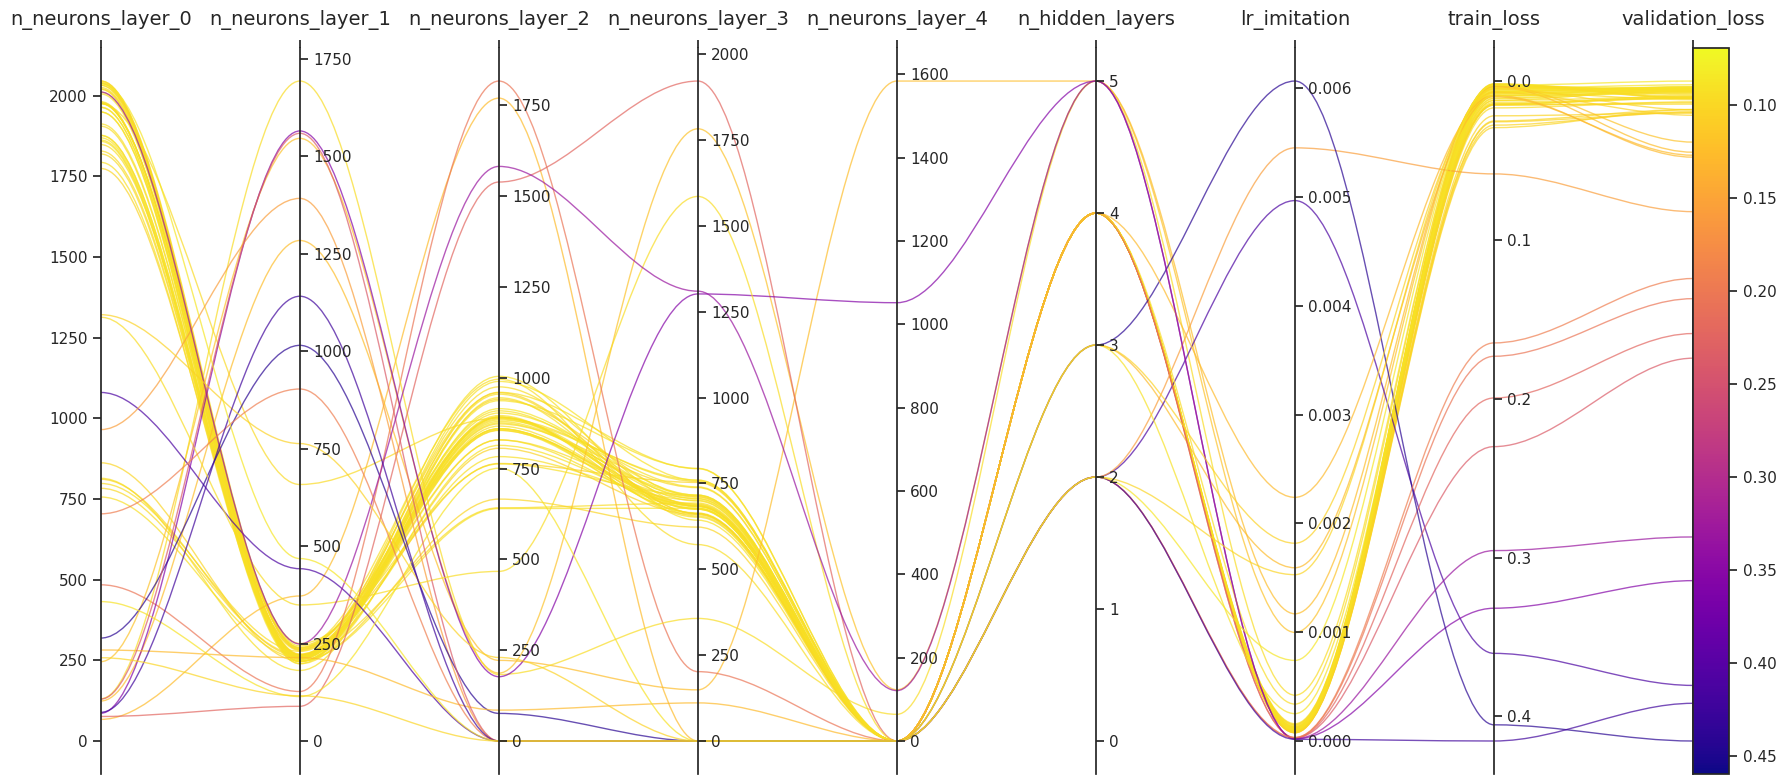

In [31]:
make_parallel_plot(df).savefig("parallel_coordinates_IL.png", dpi=200)

/tmp/ipykernel_1302686/1215705234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0, 'Correlation Coefficient')

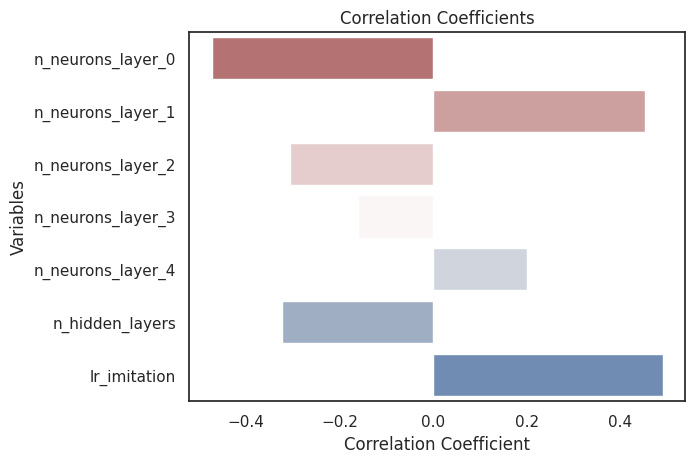

In [19]:
correlations = df.corr(numeric_only=True)["validation_loss"].drop(["validation_loss", "train_loss"])
sns.barplot(
    data=correlations,
    orient="h",
    palette="vlag_r",
)

plt.title('Correlation Coefficients')
plt.ylabel('Variables')
plt.xlabel('Correlation Coefficient')